### IMPORTING THE LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loding csv dataset
gold_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and cloumns
gold_data.shape

(2290, 6)

In [6]:
# geting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number number of missing value
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [8]:
# getting the statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation :
1.Positive Correlation <br>
2.Negative Correlation

In [9]:
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation analysis
numerical_features = gold_data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation = numerical_features.corr()

<Axes: >

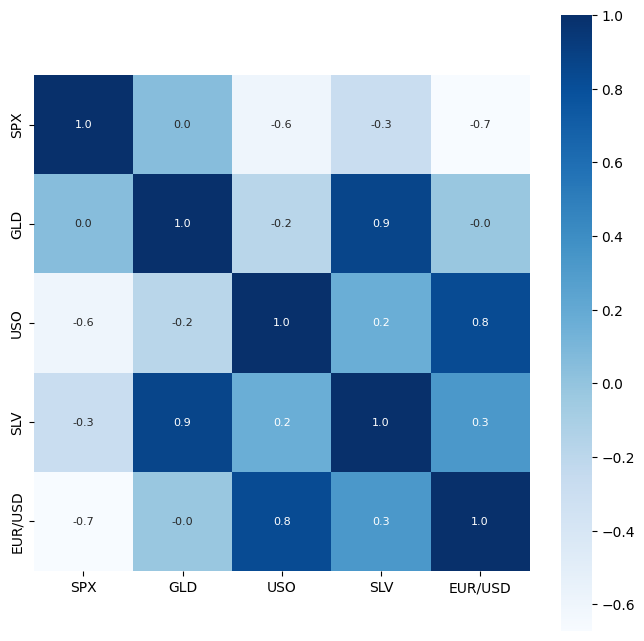

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


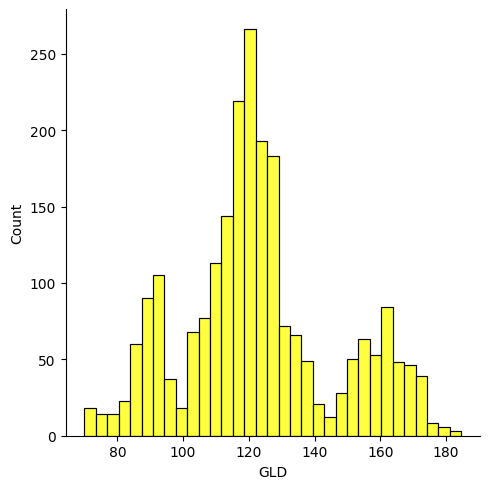

In [12]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='yellow')

Slipitting the features and target


In [13]:
X = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and test data


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Model Training

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
#training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# model evaluation
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[168.71029939  81.81150005 116.0934999  127.62940068 120.89260111
 154.5397981  150.34159841 126.32490022 117.43669874 125.90130069
 116.43000131 171.32710035 141.17839912 167.80469744 115.24770032
 117.25500058 139.24310335 170.27210091 160.01980309 159.61209937
 155.11279992 125.48400016 176.26199963 157.50960435 125.19250007
  93.90769979  77.12870044 120.5038002  119.02779889 167.45610012
  88.29060025 125.30620029  91.15240048 117.67850063 121.03239914
 136.55130153 115.54420119 114.80060091 146.74429916 107.2121007
 104.14350226  87.17479771 126.42040074 117.96320005 153.72579915
 119.6767     108.35309973 108.05579855  93.10000056 127.13159794
  75.76060012 113.68029943 121.25230031 111.34789903 118.71329868
 120.83619937 159.2757998  167.38580183 146.74789685  85.95429857
  94.1533003   86.91139922  90.73370008 119.17920083 126.43220069
 127.35609992 170.22080038 122.24409936 117.43609894  98.88320021
 168.42560063 142.65009821 131.74220259 121.05420202 120.48599946
 119.722900

In [21]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.98926540661118


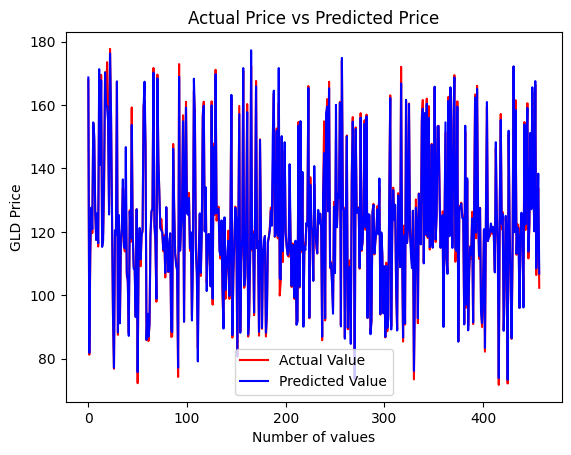

In [25]:
# Compare the actual value and predicted value
y_test = list(y_test)
plt.plot(y_test, color='red', label='Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()